# EE301 Lab 3

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import lfilter as lfilter
import pandas as pd
import os

Helper functions

In [5]:
def filter_and_plot(b, a, x):
	y = signal.lfilter(b, a, x)
	plt.figure()
	plt.plot(x, color = 'tab:gray', label='input') # linewidth=1,
	plt.plot(y, color = 'r', label='output')
	plt.legend()
	plt.grid(linestyle=':')
	plt.xlabel("time (days)")
	plt.ylabel("signals")
	# plt.xlim([0, 100])
	#plt.ylim([-20, 2])
	plt.show()
	#plt.savefig('toy.png', dpi=256)

def read_covid_data(refresh=False):
    fname = 'data/91-DIVOC-countries.csv'
    data_url = 'http://91-divoc.com/pages/covid-visualization/?chart=countries&highlight=United%20States&show=25&y=both&scale=linear&data=cases-daily&data-source=jhu&xaxis=right#countries'
    file_downloaded = os.path.isfile(fname)
    if not file_downloaded or refresh:
        ## this does not work because of indirect linking of the CSV data on the page
        data = pd.read_csv(data_url, index_col=0, header=None).fillna(value = 0).T
    else:
        data = pd.read_csv(fname, index_col=0, header=None).fillna(value = 0).T
    
    us_data = data['United States']

    return np.asarray(us_data, dtype=np.float)

def direct_dtft(x):
    ## range of normalized frequency -- nu  in [0, 0.5]
    nu = np.arange(0, 0.5, 0.001)
    N_nu_points = len(nu)

    ### the DTFT of x
    X = np.zeros(N_nu_points, dtype=np.complex)

    ## the integer time n
    n = np.arange(len(x))

    for i in range(N_nu_points):
        dtft_exp_nu = np.exp( -2.j * np.pi * nu[i] * n)
        X[i] = np.dot(x, dtft_exp_nu)
    
    return nu, X


def plot_freq_response(b, a, x_low=0, x_high=0.5, y_low=-60, y_high=0, freq_tag='', freq_scale=1):
    ## this computes the arma filter's frequency response from the diff. eq. coefficents
    w, H = signal.freqz(b, a, worN=2**16)
    
    plt.figure()
    nu =  ( w / ( 2 * np.pi ) ) 
    plt.plot(nu * freq_scale, 20 * np.log10(abs(H)), label='|H| (dB)')
    plt.legend()
    plt.grid(linestyle=':')
    xlims = np.asarray([x_low, x_high]) * freq_scale
    plt.xlim()
    plt.ylim([y_low, y_high])
    plt.xlabel(f'frequency {freq_tag}')
    plt.ylabel('filter gain (dB)')
    plt.show()

## Brief review of ARMA filters:

<font size="5">

Difference equation for an Lth order ARMA filter:

$ y[n] = \sum_{i=0}^L{b[i]x[n-i]} - \sum_{i=1}^L{a[i]y[n-i]} $

Frequency response:

$ H(z) = \frac{b[0] + b[1]z^{-1} + b[2]z^{-2} ... + b[L]z^{-L}}{1 + a[1]z^{-1} + a[2]z^{-2} ... + a[L]z^{-L}} $

In [6]:
# For the seven-day moving average filter:

b_vector = np.ones(7) / 7
a_vector = np.asarray([1])

# Grab the covid data
x_cov = read_covid_data()[200:]

filter_and_plot(b_vector, a_vector, x_cov)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 3


Our sampling frequency is 1 sample/day.

There are a lot of regular day-to-day variations in the signal (Case numbers reported on Mondays are almost always lower than the other days of the week due to weekend effects, for instance). 

A filtered version of the signal can give a better sense of the trend in cases.

We are attempting to filter out the parts of the signal with a frequency greater than 1 cycle per 7 days.

C:\Users\dillo\anaconda3\envs\ee301\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'signal freq. content (dB)')

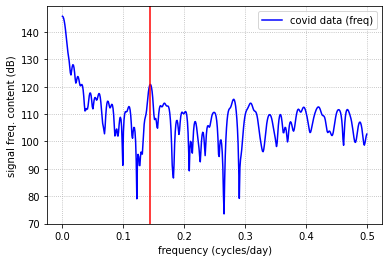

In [4]:
# plot the DTFT of the data - this is the signal's frequency content
nu, X_cov = direct_dtft(x_cov)
X_cov_mag_dB = 20 * np.log10(X_cov)
plt.figure()
plt.plot(nu, X_cov_mag_dB, color = 'b', label='covid data (freq)') # linewidth=1,
plt.axvline(x=1/7, c='r')
plt.legend()
plt.grid(linestyle=':')
plt.xlabel("frequency (cycles/day)")
plt.ylabel('signal freq. content (dB)')

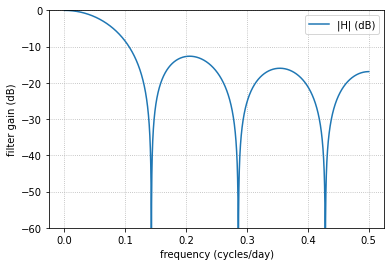

In [5]:
plot_freq_response(b_vector, a_vector, freq_tag='(cycles/day)')

## Moving Average Filter

In [ ]:
# Write code here

## Simple Butterworth Filter Design

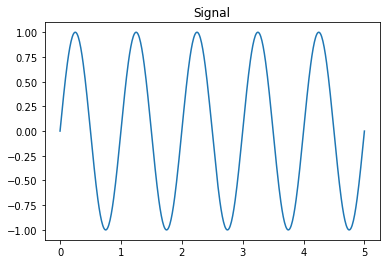

In [7]:
fs = 100 # Sample frequency, in Hertz

duration = 5 # in seconds

t = np.linspace(start = 0, stop = duration, num = fs*duration)

f_naught = 1

sig = np.sin(f_naught*2*np.pi*t) # Simple sine wave with frequency f naught

plt.title('Signal')
plt.plot(t,sig)
plt.show()

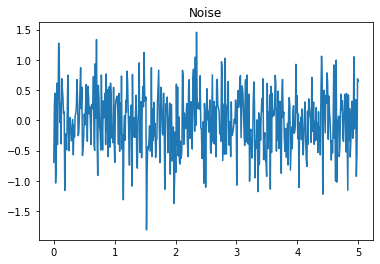

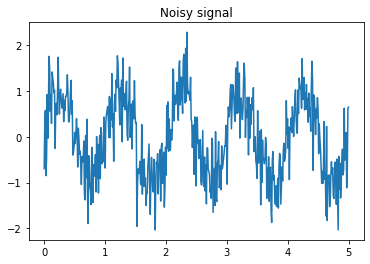

In [8]:
noise = np.random.normal(0,0.5, fs*duration)
plt.title('Noise')
plt.plot(t,noise)
plt.show()


noisy_signal = sig + noise
plt.title('Noisy signal')
plt.plot(t,noisy_signal)
plt.show()

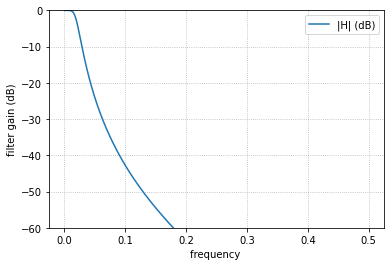

In [9]:
L = 3

cutoff_freq = 2

b,a = signal.butter(L, 2*cutoff_freq/fs, btype = 'lowpass')

plot_freq_response(b, a, freq_tag='')

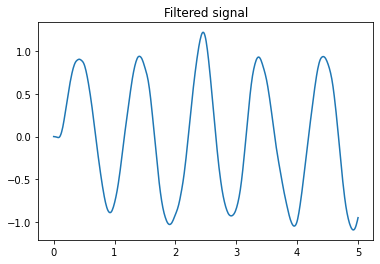

In [10]:
filtered_signal = signal.lfilter(b, a, noisy_signal)

plt.title('Filtered signal')
plt.plot(t,filtered_signal)
plt.show()

Let's make our noise sinusoids with unwanted frequencies.

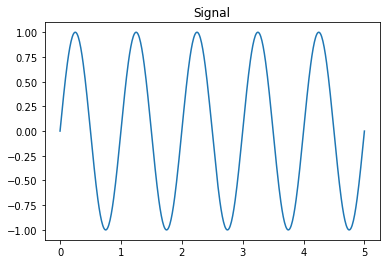

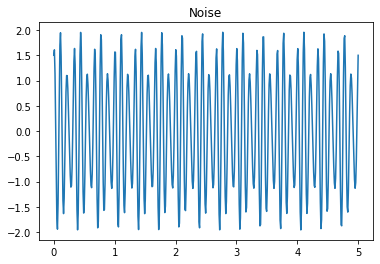

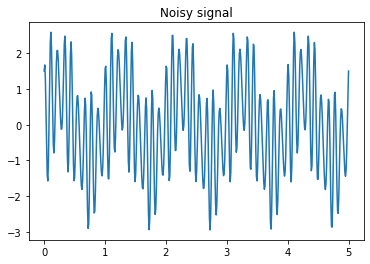

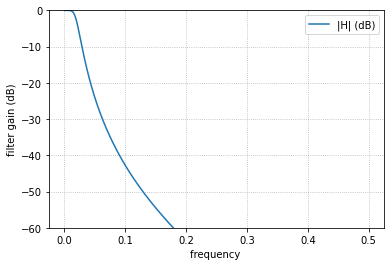

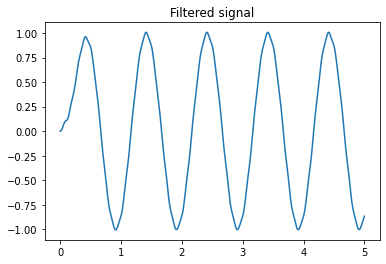

In [11]:
fs = 100 # Sample frequency, in Hertz

duration = 5 # in seconds

t = np.linspace(start = 0, stop = duration, num = fs*duration)

f_naught = 1

sig = np.sin(f_naught*2*np.pi*t) # Simple sine wave with frequency f naught

plt.title('Signal')
plt.plot(t,sig)
plt.show()

noise = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12*2*np.pi*t)
plt.title('Noise')
plt.plot(t,noise)
plt.show()


noisy_signal = sig + noise
plt.title('Noisy signal')
plt.plot(t,noisy_signal)
plt.show()

L = 3

cutoff_freq = 2

b,a = signal.butter(L, 2*cutoff_freq/fs, btype = 'lowpass')

plot_freq_response(b, a, freq_tag='')

filtered_signal = signal.lfilter(b, a, noisy_signal)
plt.show()

plt.title('Filtered signal')
plt.plot(t,filtered_signal)
plt.show()

Now let the noise be the previous signal:

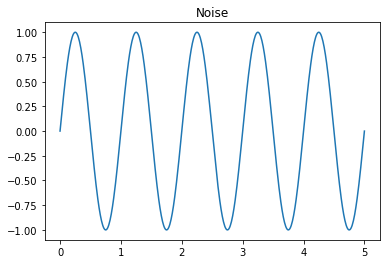

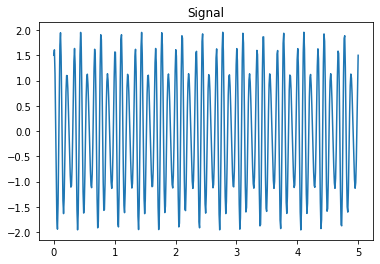

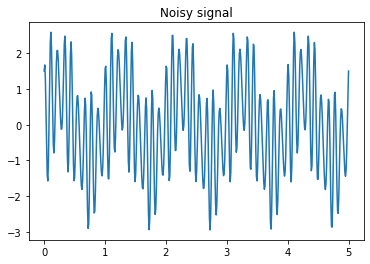

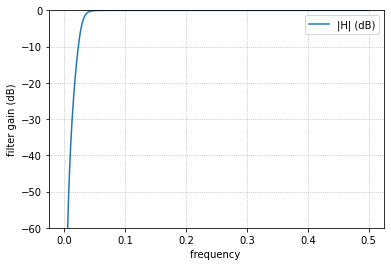

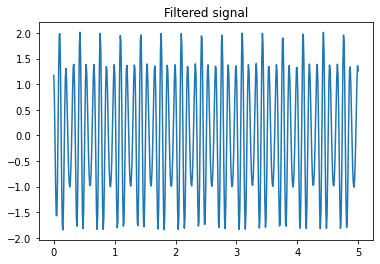

In [12]:
fs = 100 # Sample frequency, in Hertz

duration = 5 # in seconds

t = np.linspace(start = 0, stop = duration, num = fs*duration)

f_naught = 1

noise = np.sin(f_naught*2*np.pi*t) # Simple sine wave with frequency f naught

plt.title('Noise')
plt.plot(t,noise)
plt.show()

sig = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12*2*np.pi*t)
plt.title('Signal')
plt.plot(t,sig)
plt.show()


noisy_signal = sig + noise
plt.title('Noisy signal')
plt.plot(t,noisy_signal)
plt.show()

L = 4

cutoff_freq = 3

b,a = signal.butter(L, 2*cutoff_freq/fs, btype = 'highpass') # Now we want a high pass filter because our "noise" is concentrated in the low frequencies

plot_freq_response(b, a, freq_tag='')

filtered_signal = signal.lfilter(b, a, noisy_signal)
plt.show()

plt.title('Filtered signal')
plt.plot(t,filtered_signal)
plt.show()

## Impulse responses and LTI systems

In [13]:
delta = signal.unit_impulse(10)
delta

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

$ y[n] = x[n] + 0.5y[n-1] $ 

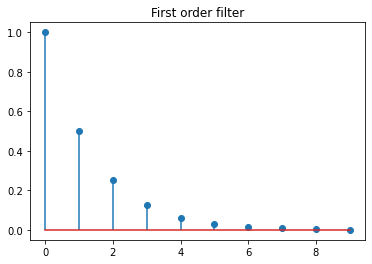

In [14]:
b = [1]
a = [1, -0.5]

plt.title('First order filter')
plt.stem(signal.lfilter(b, a, delta))
plt.show()

$ y[n] = 0.5x[n] + 0.3x[n-1] + 0.2x[n-2] - 0.8y[n-1] - 0.8y[n-2] $ 

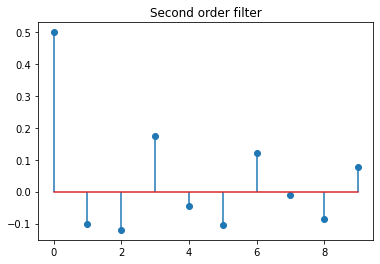

In [15]:
b = [0.5, 0.3, 0.2]
a = [1, 0.8, 0.8]

plt.title('Second order filter')
plt.stem(lfilter(b, a, delta))
plt.show()

### Time shifting

In [16]:
shifted_delta = np.roll(delta, 2)
shifted_delta

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

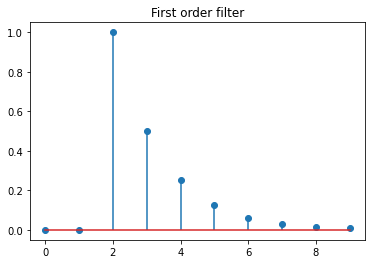

In [17]:
b = [1]
a = [1, -0.5]

plt.title('First order filter')
plt.stem(lfilter(b, a, shifted_delta))
plt.show()

In [18]:
filter_output = lfilter(b, a, delta)
shifted_output = np.roll(filter_output, 2)

shifted_output[0:2] = 0

shifted_output

array([0.       , 0.       , 1.       , 0.5      , 0.25     , 0.125    ,
       0.0625   , 0.03125  , 0.015625 , 0.0078125])

Check Time invariance

In [19]:
np.array_equal(lfilter(b,a,shifted_delta), shifted_output)

True

### Linearity

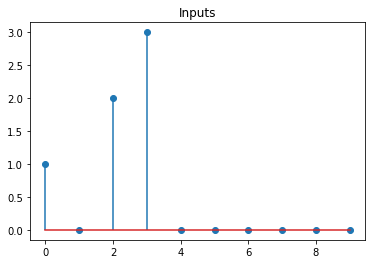

In [20]:
b = [1]
a = [1, -0.5]

x = delta 
y = 2*shifted_delta
z = 3*np.roll(delta,3)

plt.title('Inputs')
plt.stem(x+y+z)
plt.show()

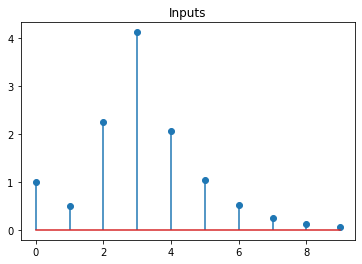

In [21]:
plt.title('Inputs')
plt.stem(lfilter(b,a,x+y+z))
plt.show()

Check linearity:

In [22]:
combined_output = lfilter(b,a,x) + lfilter(b,a,y) + lfilter(b,a,z)

np.array_equal(lfilter(b,a, x+y+z), combined_output)

True

Another example?

$ y = nx[n] $